# Simulated annealing

Mediante esta técnica de búsqueda heurística intentaremos aproximarnos al mínimo de la siguiente función:

$$
f(x,y) = 0.2 + x^2 + y^2 - 0.1 \cdot \cos(6 \pi x) - 0.1 \cdot \cos(6 \pi y)
$$

<img src="imgs/function_min.jpg" width=70%>

Su mínimo se encuentra en el punto $(0,0)$.

iteration Number =  0   best_so_far =  [-8.3506167  21.92515248]   new_best = 550.53550
iteration Number =  1   best_so_far =  [-8.26407594 21.69499861]   new_best = 539.05545
iteration Number =  2   best_so_far =  [-8.08959477 21.61887792]   new_best = 532.96760
iteration Number =  3   best_so_far =  [-8.05769086 21.59394088]   new_best = 531.35911
iteration Number =  4   best_so_far =  [-7.91148006 21.38792681]   new_best = 520.19255
iteration Number =  5   best_so_far =  [-7.94372178 21.34952138]   new_best = 518.96062
iteration Number =  6   best_so_far =  [-7.83034484 21.23953225]   new_best = 512.75261
iteration Number =  7   best_so_far =  [-7.84758766 21.15174641]   new_best = 509.37327
iteration Number =  9   best_so_far =  [-7.73339341 21.03878689]   new_best = 502.52951
iteration Number =  11   best_so_far =  [-7.74568243 20.94520995]   new_best = 498.83862
iteration Number =  15   best_so_far =  [-7.71811063 20.83614246]   new_best = 493.95707
iteration Number =  18   best_

iteration Number =  225   best_so_far =  [-4.24844881 13.87320212]   new_best = 210.79180
iteration Number =  232   best_so_far =  [-4.27734854 13.83402049]   new_best = 209.92674
iteration Number =  233   best_so_far =  [-4.20894841 13.7986795 ]   new_best = 208.46780
iteration Number =  235   best_so_far =  [-4.12694153 13.64754721]   new_best = 203.46698
iteration Number =  236   best_so_far =  [-4.17445224 13.45159646]   new_best = 198.73105
iteration Number =  237   best_so_far =  [-4.04868772 13.43017821]   new_best = 196.92509
iteration Number =  238   best_so_far =  [-4.23565861 13.34093229]   new_best = 196.04913
iteration Number =  240   best_so_far =  [-4.1345379  13.19327602]   new_best = 191.52705
iteration Number =  242   best_so_far =  [-3.92986704 13.13689822]   new_best = 188.28181
iteration Number =  243   best_so_far =  [-3.94914913 13.03097408]   new_best = 185.46094
iteration Number =  246   best_so_far =  [-3.93702328 12.95945032]   new_best = 183.53859
iteration 

iteration Number =  494   best_so_far =  [-0.74147303  4.37099413]   new_best = 19.76333
iteration Number =  495   best_so_far =  [-0.87526049  4.27889063]   new_best = 19.29378
iteration Number =  498   best_so_far =  [-0.82056169  4.27816252]   new_best = 19.22268
iteration Number =  500   best_so_far =  [-0.7842269  4.1801905]   new_best = 18.44593
iteration Number =  502   best_so_far =  [-1.10243979  4.11377168]   new_best = 18.42776
iteration Number =  504   best_so_far =  [-1.0244906   4.00514159]   new_best = 17.10163
iteration Number =  511   best_so_far =  [-1.11583495  3.94275108]   new_best = 17.00081
iteration Number =  512   best_so_far =  [-1.0896474   3.88404818]   new_best = 16.54283
iteration Number =  513   best_so_far =  [-1.00202741  3.89637372]   new_best = 16.32338
iteration Number =  517   best_so_far =  [-0.78599313  3.72388326]   new_best = 14.70037
iteration Number =  518   best_so_far =  [-0.59047207  3.73012735]   new_best = 14.41234
iteration Number =  520

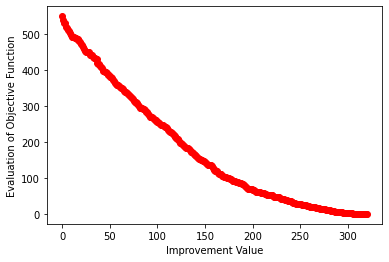

In [61]:
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot
import math


# define objective function
def objective(step):
    x1 = step[0]
    x2 = step[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj


# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    
    # evaluate initial point
    start_point_eval = objective(start_point)
    
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    
    for i in range(iterations):
        
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
            outputs.append(start_point_eval)  #Append the new values into the output list
            #print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
            print('iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
          
        difference = mia_start_eval - mia_step_eval
        t = temperature / float(i + 1)
        
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(difference / t)
        
        # check whether the new point is acceptable 
        if difference > 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
            
    return [start_point, start_point_eval, outputs]

seed(1)

# define the area of the search space
# area = asarray([[-6.0, 6.0]])
area = asarray([[-50.0, 50.0],[-50.0, 50.0]])

# initial temperature
temperature = 12

# define the total no. of iterations
iterations = 1200

# define maximum step_size
step_size = 0.1

# perform the simulated annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)

#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()

## Ejercicios

1) Crea un código para generar 1200 muestras aleatorias (mismo número de iteraciones que el código anterior) y compara el mejor valor obtenido de forma totalmente aleatoria con el mejor valor obtenido mediante *simulated annealing*

2) Qué ocurriría si la temperatura se mantuviera inalterada durante todas las iteraciones?